In [3]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [17]:
def get_weights(w_type: str, str_list: list[str], curs: sqlite3.Cursor):
    for x in str_list:
        print(f"Enter your weight for {x} in Lbs:")
        weight = int(input().strip())
        curs.execute("INSERT INTO weights VALUES (?, ?, ?, ?)", (datetime.date.today(),w_type, x, weight))

def insert_values():
    upper = [
            "DB Bench",
            "Lat Pulldown",
            "DB Shoulder Press",
            "DB Rows",
            "DB Shoulder Shrugs",
            "Shoulder Push",
            "Curls"
            ]

    lower = [
            "DB Squat",
            "Single Leg DB Deadlift",
            "Split Squat",
            "Hip Thrust",
            "Step Ups",
            "Plank"
            ]


    db = sqlite3.connect("weights.db")
    curs = db.cursor()
    curs.execute("CREATE TABLE IF NOT EXISTS weights(date TEXT, workout, exercise TEXT, weight NUMBER)")


    # get the values from this week
    print("Which workout are you entering values for:\n1) Upper Body\n2) Lower Body")
    a = int(input().strip())

    if a == 1:
        get_weights("UB", upper, curs)

    elif a == 2:
        get_weights("LB", lower, curs)


    curs.close()
    db.commit()
    db.close()


insert_values()

Which workout are you entering values for:
1) Upper Body
2) Lower Body


KeyboardInterrupt: Interrupted by user

In [5]:
def get_data(filename):
    cnx = sqlite3.connect('weights.db')
    df = pd.read_sql_query("SELECT * FROM weights", cnx)
    return df


df = get_data("weights.db")
    

/tmp/ipykernel_358056/3052953656.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(df.loc[df.workout == "LB", :], x="date", y="weight", hue="exercise", palette="deep", ax=ax2)


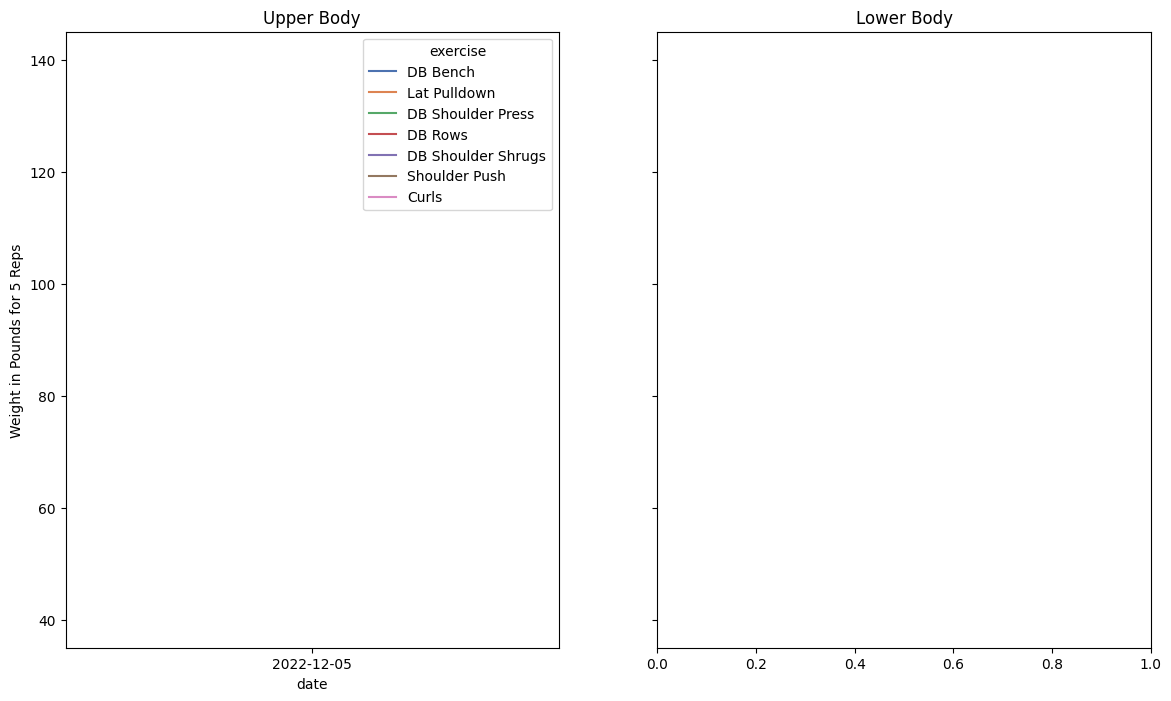

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(14, 8)
sns.lineplot(df.loc[df.workout == "UB", :], x="date", y="weight", hue="exercise", palette="deep", ax=ax1)
sns.lineplot(df.loc[df.workout == "LB", :], x="date", y="weight", hue="exercise", palette="deep", ax=ax2)
ax1.set_title("Upper Body")
ax2.set_title("Lower Body")
ax1.set_ylabel("Weight in Pounds for 5 Reps")
plt.show()